In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('MusicData.csv')
df

,index,Format,Metric,Year,Number of Records,Value (Actual)
0,0,CD,Units,1973,1,NaN
1,1,CD,Units,1974,1,NaN
2,2,CD,Units,1975,1,NaN
3,3,CD,Units,1976,1,NaN
4,4,CD,Units,1977,1,NaN
...,...,...,...,...,...,...
3003,3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,3006,Vinyl Single,Value (Adjusted),2018,1,5.386197


In [2]:
# Handle missing values
df['Value (Actual)'].fillna(method='ffill', inplace=True)  # Forward fill missing values with the previous non-missing value

# Handle inconsistencies
df.loc[df['Value (Actual)'] < 0, 'Value (Actual)'] = np.nan  # Replace negative values with NaN

# Convert data types
df['Year'] = pd.to_numeric(df['Year'], downcast='integer')  # Convert 'Year' column to integer
df['Number of Records'] = pd.to_numeric(df['Number of Records'], downcast='integer')  # Convert 'Number of Records' column to integer
df['Value (Actual)'] = pd.to_numeric(df['Value (Actual)'], downcast='float')  # Convert 'Value (Actual)' column to float

print(df.dtypes)

index                  int64
Format                object
Metric                object
Year                   int16
Number of Records       int8
Value (Actual)       float32
dtype: object


/var/folders/cc/txg44nl176v3xfyt08_33rm00000gn/T/ipykernel_2287/539086805.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Value (Actual)'].fillna(method='ffill', inplace=True)  # Forward fill missing values with the previous non-missing value


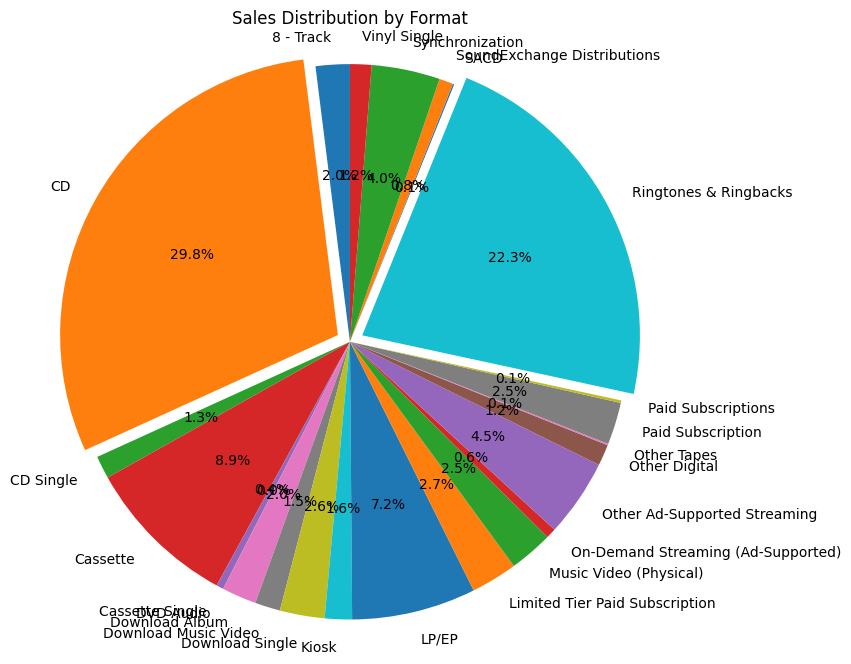

In [3]:
# Visualize format impact over the years.

# Group the data by format and calculate the total sales
sales_by_format = df.groupby('Format')['Value (Actual)'].sum()
explode = (0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.05, 0, 0, 0, 0)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_format, labels=sales_by_format.index, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Sales Distribution by Format')
plt.axis('equal')
plt.show()

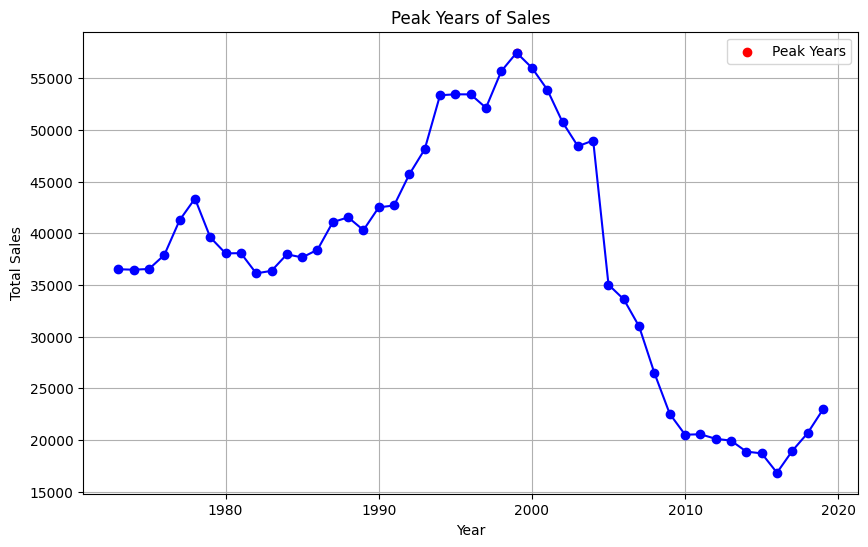

In [4]:
# Visualize peak years.

# Group the data by year and calculate the total sales
sales_by_year = df.groupby('Year')['Value (Actual)'].sum()

# Find the peak years
peak_years = sales_by_year[sales_by_year == sales_by_year.max()]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-', color='b')
plt.scatter(peak_years.index, peak_years.values, color='r', label='Peak Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Peak Years of Sales')
plt.legend()
plt.grid(True)
plt.show()

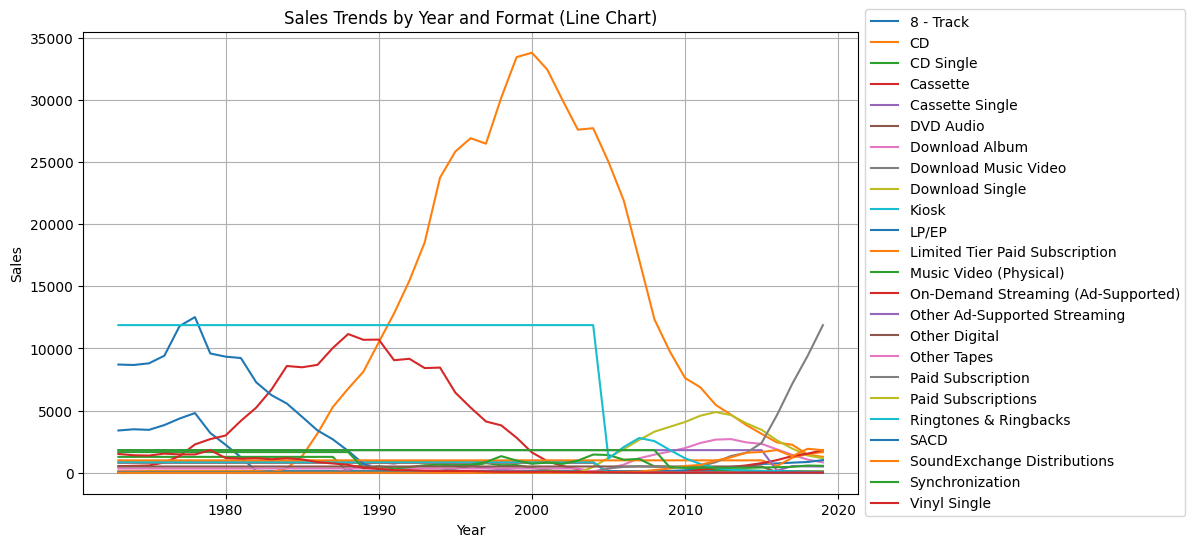

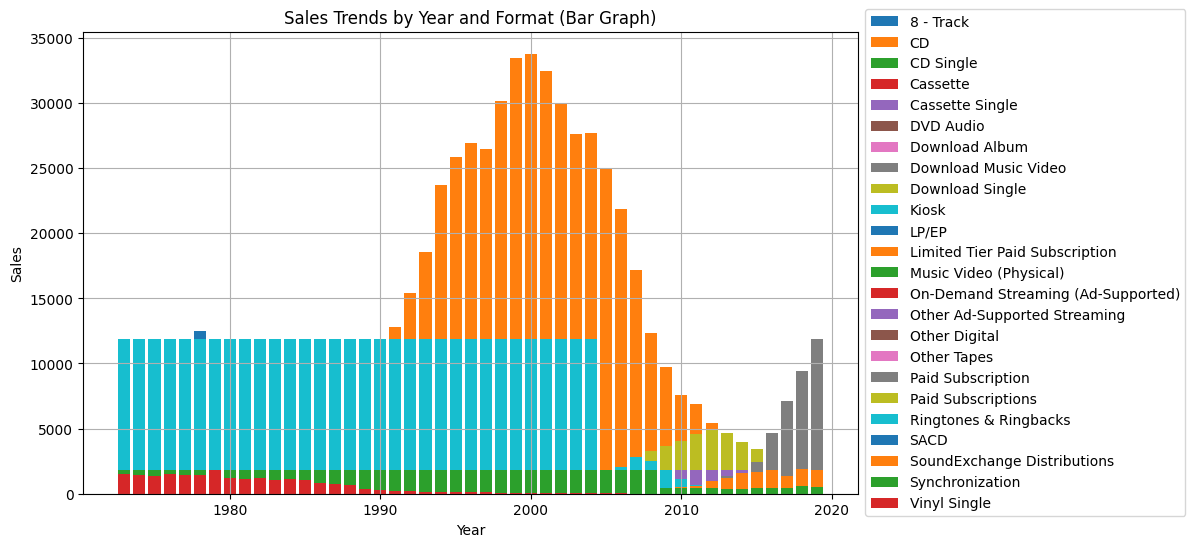

In [5]:
# Visualize sales trends over the years using line charts and bar graphs.

import matplotlib.pyplot as plt

# Group the data by year and format and calculate the sum of sales
sales_by_year_format = df.groupby(['Year', 'Format'])['Value (Actual)'].sum().reset_index()

# Line chart
plt.figure(figsize=(10, 6))
for format_type in sales_by_year_format['Format'].unique():
    format_data = sales_by_year_format[sales_by_year_format['Format'] == format_type]
    plt.plot(format_data['Year'], format_data['Value (Actual)'], label=format_type)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Trends by Year and Format (Line Chart)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

# Bar graph
plt.figure(figsize=(10, 6))
for format_type in sales_by_year_format['Format'].unique():
    format_data = sales_by_year_format[sales_by_year_format['Format'] == format_type]
    plt.bar(format_data['Year'], format_data['Value (Actual)'], label=format_type)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Trends by Year and Format (Bar Graph)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

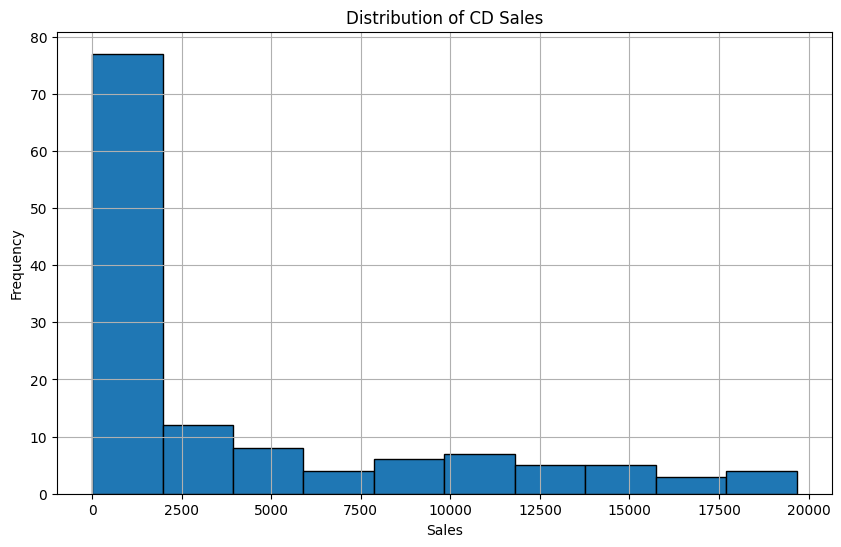

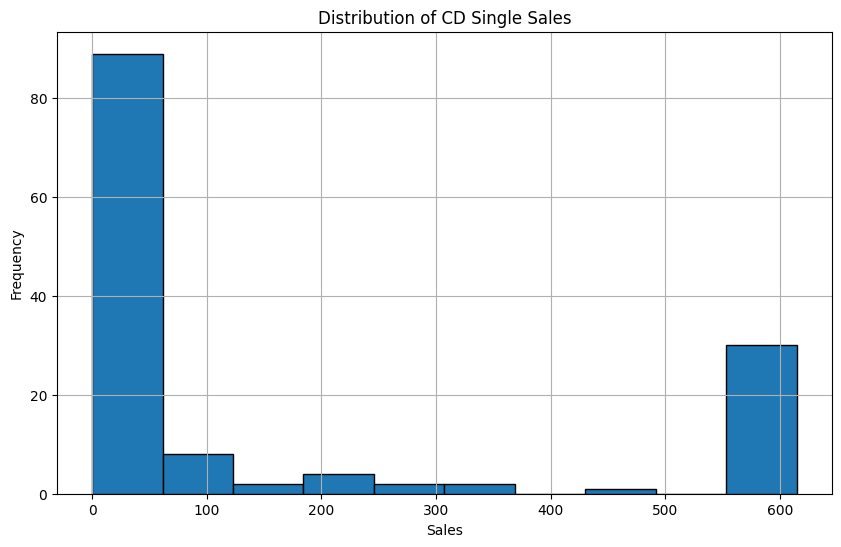

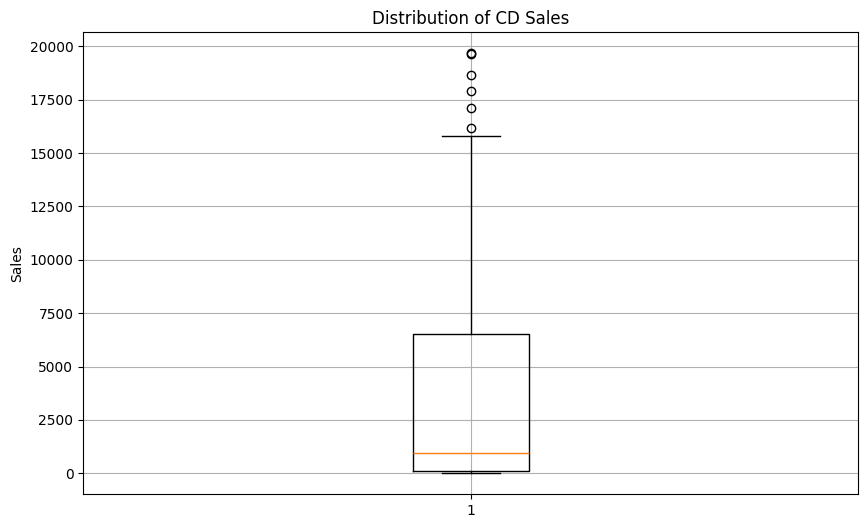

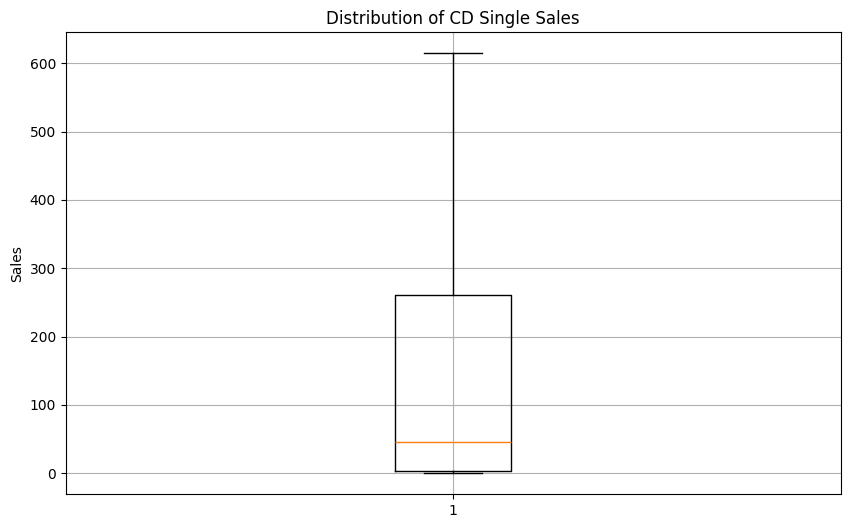

In [6]:
# Explore the distribution of sales for CDs and CD Singles.

# Filter the data for CDs and CD Singles
cd_data = df[df['Format'] == 'CD']
cd_single_data = df[df['Format'] == 'CD Single']

# Histogram for CD sales
plt.figure(figsize=(10, 6))
plt.hist(cd_data['Value (Actual)'].dropna(), bins=10, edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of CD Sales')
plt.grid(True)
plt.show()

# Histogram for CD Single sales
plt.figure(figsize=(10, 6))
plt.hist(cd_single_data['Value (Actual)'].dropna(), bins=10, edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of CD Single Sales')
plt.grid(True)
plt.show()

# Box plot for CD sales
plt.figure(figsize=(10, 6))
plt.boxplot(cd_data['Value (Actual)'].dropna())
plt.ylabel('Sales')
plt.title('Distribution of CD Sales')
plt.grid(True)
plt.show()

# Box plot for CD Single sales
plt.figure(figsize=(10, 6))
plt.boxplot(cd_single_data['Value (Actual)'].dropna())
plt.ylabel('Sales')
plt.title('Distribution of CD Single Sales')
plt.grid(True)
plt.show()